# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import seaborn as sns

In [2]:
# Reading csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Dropping the serial no.
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# PERFORMING EXPLORATORY DATA ANALYSIS

In [5]:
# checking for null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# PERFORMING DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0D3F05808>,
      dtype=object)

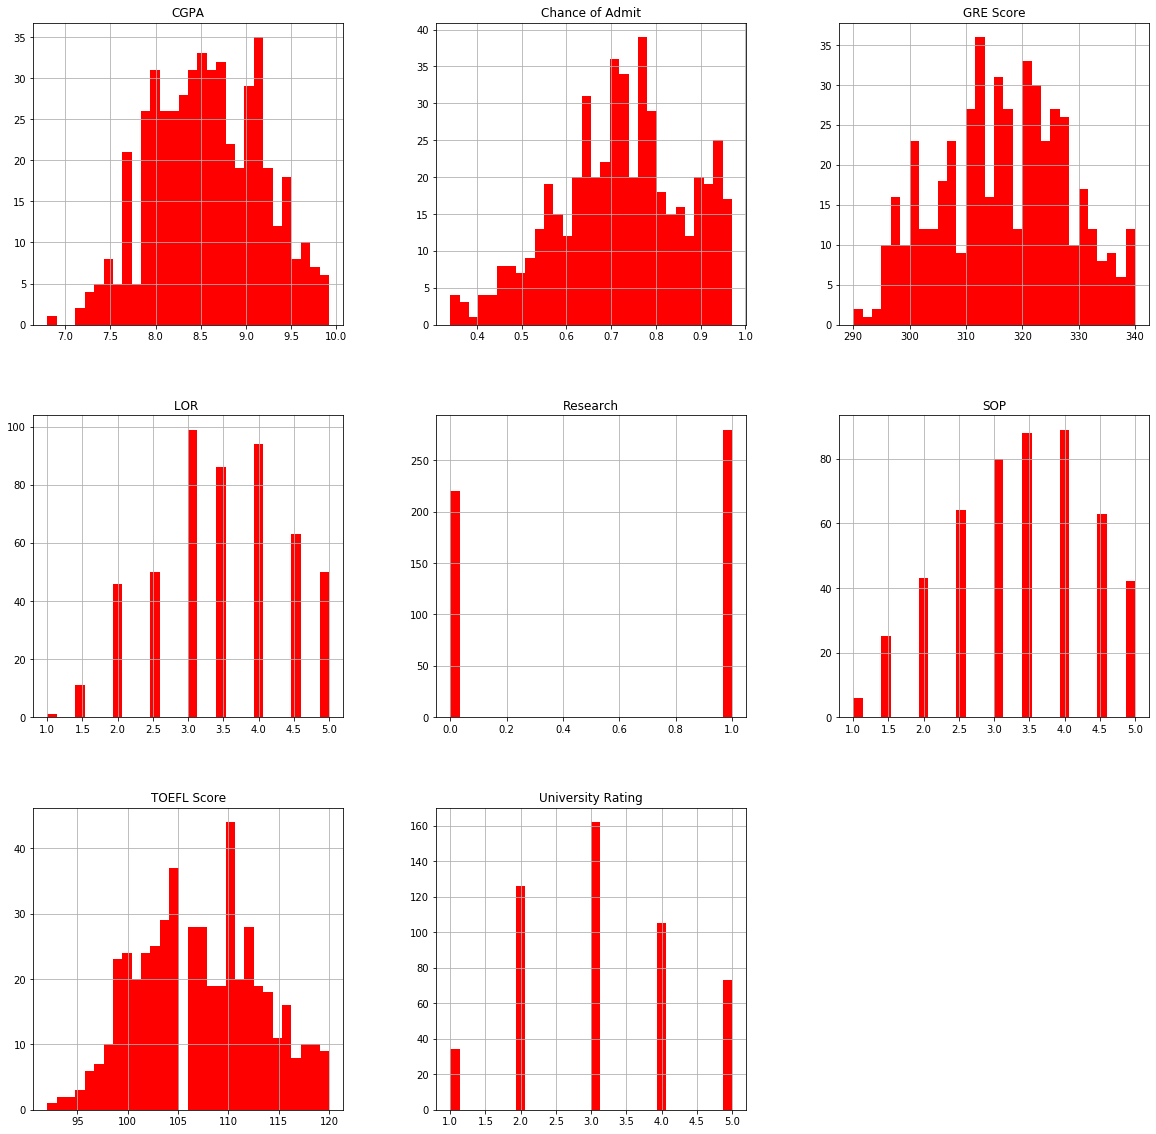

In [9]:
admission_df.hist(bins = 30, figsize = (20, 20), color='r')

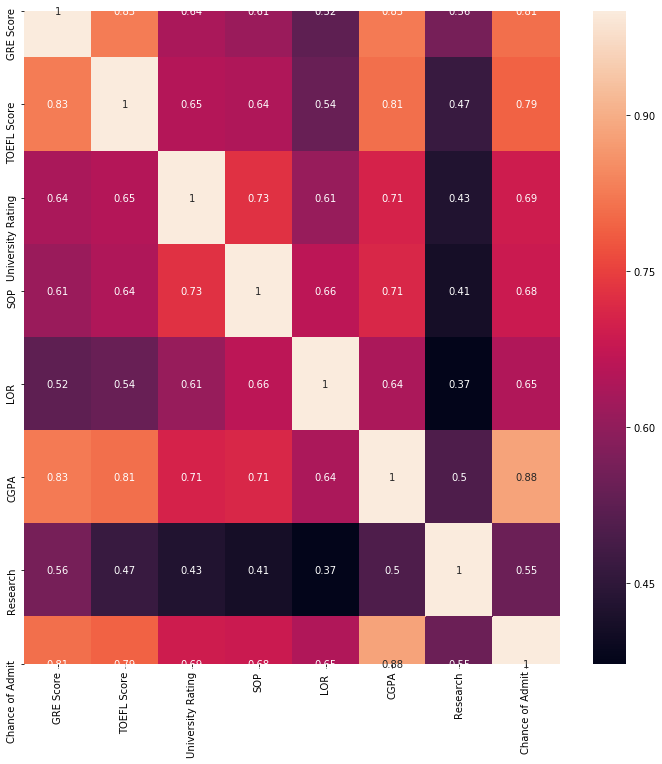

In [10]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12,))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# CREATE TRAINING AND TESTING DATASET

In [11]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
X = admission_df.drop(columns=['Chance of Admit'])

In [13]:
y = admission_df['Chance of Admit']

In [14]:
X.shape

(500, 7)

In [15]:
y.shape

(500,)

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
y = y.reshape(-1,1)

In [18]:
y.shape

(500, 1)

In [19]:
# Scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [20]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [21]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,shuffle='False')
y_test_orig = scaler_y.inverse_transform(y_test)

# Implementing Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
lr_pred = linear_regression_model.predict(X_test)

lr_predict_orig = scaler_y.inverse_transform(lr_pred)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, lr_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, lr_predict_orig)
MAE = mean_absolute_error(y_test_orig, lr_predict_orig)
r2 = r2_score(y_test_orig, lr_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.076 
MSE = 0.005724340291784659 
MAE = 0.05526442788845096 
R2 = 0.7174409323101756


# Implementing Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)
dt_pred = decisionTree_model.predict(X_test)

dt_predict_orig =  scaler_y.inverse_transform(dt_pred)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, dt_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, dt_predict_orig)
MAE = mean_absolute_error(y_test_orig, dt_predict_orig)
r2 = r2_score(y_test_orig, dt_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.108 
MSE = 0.011690666666666662 
MAE = 0.0776 
R2 = 0.4229371935231371


# Implementing SVM 

In [24]:
from sklearn.svm import SVR
svm_model = SVR(kernel = 'rbf')
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

svm_predict_orig = scaler_y.inverse_transform(svm_pred)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, svm_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, svm_predict_orig)
MAE = mean_absolute_error(y_test_orig, svm_predict_orig)
r2 = r2_score(y_test_orig, svm_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.08 
MSE = 0.00643377370933298 
MAE = 0.058296785432251544 
R2 = 0.682422600968458


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Implementing Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomforest_model.fit(X_train,y_train)
rf_predict = randomforest_model.predict(X_test)

rf_predict_orig = scaler_y.inverse_transform(rf_predict)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, rf_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, rf_predict_orig)
MAE = mean_absolute_error(y_test_orig, rf_predict_orig)
r2 = r2_score(y_test_orig, rf_predict_orig)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.085 
MSE = 0.007272143546739423 
MAE = 0.061206801322092254 
R2 = 0.6410398411110806


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Saving and tesing our model using Pickle module

In [26]:
import pickle

In [27]:
s = np.array([320, 110, 1,5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [28]:
pickle.dump(linear_regression_model, open('linear_regression_model.pkl', 'wb'))

In [29]:
model1 = pickle.load(open('linear_regression_model.pkl', 'rb'))
print(model1.predict(s))

[[80.89496634]]
